In [ ]:
!pip install shap
!pip install transformers


In [ ]:
!pip install nlp

In [3]:
import shap
import transformers
import nlp
import torch
from pathlib import Path
import numpy as np
import scipy as sp

# project_dir = Path.cwd()
# print(project_dir)

from transformers import AutoModelForSequenceClassification
# load a BERT sentiment analysis model
tokenizer = transformers.AutoTokenizer.from_pretrained("ProsusAI/finbert")
# model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert").cuda()
cl_path = '/content/drive/MyDrive/classifier_model/finbert-sentiment'
model = AutoModelForSequenceClassification.from_pretrained(cl_path, cache_dir=None, num_labels=3).cuda()

# define a prediction function
def f(x):
    tv = torch.tensor([tokenizer.encode(v, padding='max_length', max_length=500, truncation=True) for v in x]).cuda()
    outputs = model(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:,1]) # use one vs rest logit units
    return val

# build an explainer using a token masker


In [4]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset

df=pd.read_csv("dataSpecial.csv", encoding="latin", header=[0])
df

,Description,Semantic
0,Finnish Talentum reports its operating profit ...,positive
1,"Lifetree was founded in 2000 , and its revenue...",positive
2,Nokia also noted the average selling price of ...,positive
3,Calls to the switchboard and directory service...,negative
4,"Earnings per share EPS are seen at EUR 0.56 , ...",positive
5,The growth of net sales has continued favourab...,positive
6,The company slipped to an operating loss of EU...,negative
7,The company 's profit before taxes fell to EUR...,negative
8,Unit costs for flight operations fell by 6.4 p...,negative
9,"Tiimari , the Finnish retailer , reported to h...",positive


In [6]:
desc=df['Description']
print(type(desc))

df2 = desc.to_frame(name="Desc")
print(type(df2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
dataset = ds.dataset(pa.Table.from_pandas(df2).to_batches())

### convert to Huggingface dataset
data = Dataset(pa.Table.from_pandas(df2))

In [8]:
explainer = shap.Explainer(f, tokenizer)

# explain the model's predictions on IMDB reviews
shap_values = explainer(data['Desc'][:10], fixed_context=1)

Partition explainer: 11it [00:14,  3.63s/it]


In [9]:
print(data[0:1])

{'Desc': ['Finnish Talentum reports its operating profit increased to EUR 20.5 mn in 2005 from EUR 9.3 mn in 2004 , and net sales totaled EUR 103.3 mn , up from EUR 96.4 mn .']}


In [10]:
shap.plots.text(shap_values[0:1])


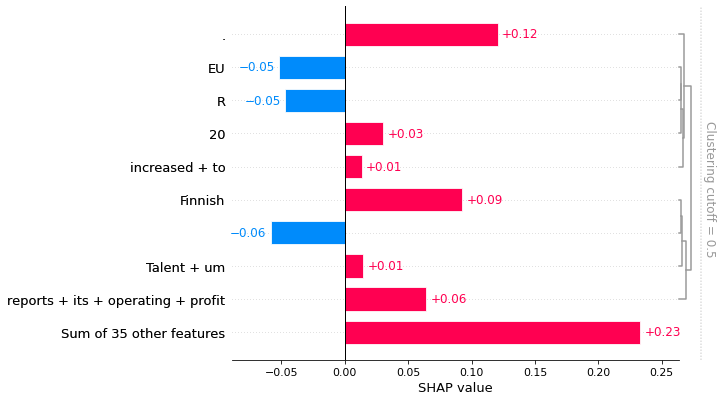

In [11]:
shap.plots.bar(shap_values[0])

In [12]:
shap.plots.text(shap_values[1:2])

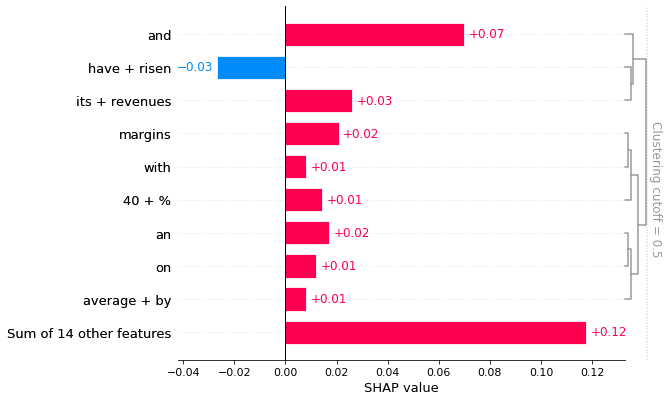

In [13]:
shap.plots.bar(shap_values[1])

In [14]:
shap.plots.text(shap_values[2:3])

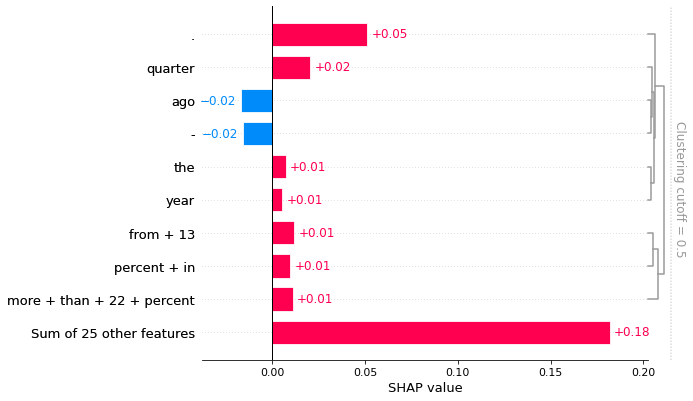

In [15]:
shap.plots.bar(shap_values[2])

In [16]:
shap.plots.text(shap_values[3:4])

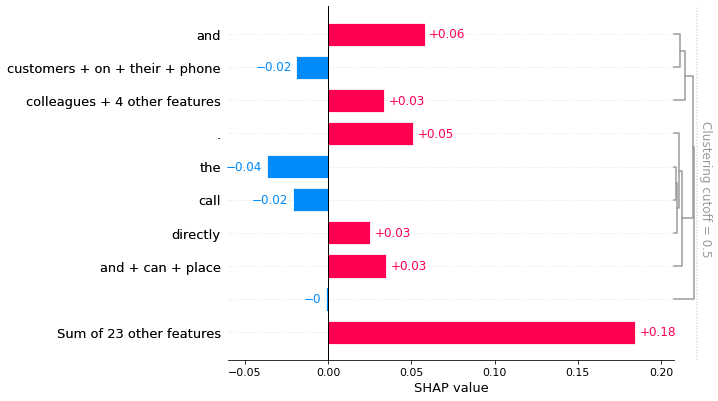

In [17]:
shap.plots.bar(shap_values[3])

In [19]:
shap.plots.text(shap_values[4:5])

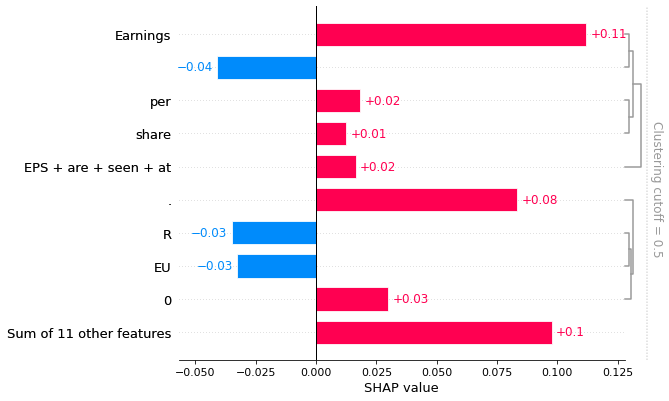

In [20]:
shap.plots.bar(shap_values[4])

In [21]:
shap.plots.text(shap_values[5:6])